<a href="https://colab.research.google.com/github/slapazromero/Coches_net/blob/main/Prediccion_coches_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importación de librerias.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
import numpy as np
import zipfile
import math
import pickle

from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import files
from sklearn.feature_extraction import DictVectorizer

## 2. Importación y visualización del dataframe .

In [ ]:
dataframe = pd.read_json('data.json', orient='table')

In [ ]:
dataframe

,color,fuelType,km,make,model,price,province,transmissionType,year,seller_type,bodyType,cubicCapacity,doors,hp
0,COLOR_WHITE,Gasolina,78175.0,OPEL,Corsa,12990.0,Barcelona,TRANSMISSION_MANUAL,2019.0,profesional,BODY_TYPE_SEDAN,1398.0,5.0,90.0
1,COLOR_BLUE,Diésel,77115.0,OPEL,Grandland X,19950.0,Lleida,TRANSMISSION_MANUAL,2018.0,profesional,BODY_TYPE_4X4,1560.0,5.0,120.0
2,COLOR_WHITE,Gas licuado (GLP),48100.0,OPEL,Corsa,15500.0,Barcelona,TRANSMISSION_MANUAL,2018.0,particular,BODY_TYPE_SEDAN,1398.0,5.0,90.0
3,COLOR_BLUE,Gasolina,43990.0,OPEL,Corsa,16600.0,Barcelona,TRANSMISSION_MANUAL,2021.0,profesional,BODY_TYPE_SEDAN,1199.0,5.0,100.0
4,COLOR_BEIGE,Diésel,31000.0,OPEL,Combo Life,23500.0,Las Palmas,TRANSMISSION_MANUAL,2021.0,particular,BODY_TYPE_MINIVAN,1499.0,5.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14264,COLOR_WHITE,Diésel,92000.0,SKODA,Rapid,9950.0,Las Palmas,TRANSMISSION_MANUAL,2013.0,profesional,BODY_TYPE_SEDAN,1598.0,5.0,105.0
14265,COLOR_WHITE,Gasolina,56000.0,SKODA,Fabia,7499.0,Madrid,TRANSMISSION_MANUAL,2013.0,profesional,BODY_TYPE_SEDAN,1198.0,5.0,60.0
14266,COLOR_RED,Diésel,28500.0,SKODA,Karoq,28900.0,Córdoba,TRANSMISSION_MANUAL,2022.0,profesional,BODY_TYPE_4X4,1968.0,5.0,150.0
14267,COLOR_GRAY,Diésel,111000.0,SKODA,Octavia,14450.0,Madrid,TRANSMISSION_MANUAL,2019.0,profesional,BODY_TYPE_FAMILIAR,1598.0,5.0,115.0


<ipython-input-4-5879926ea6b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='BrBG', annot=True)


<Axes: >

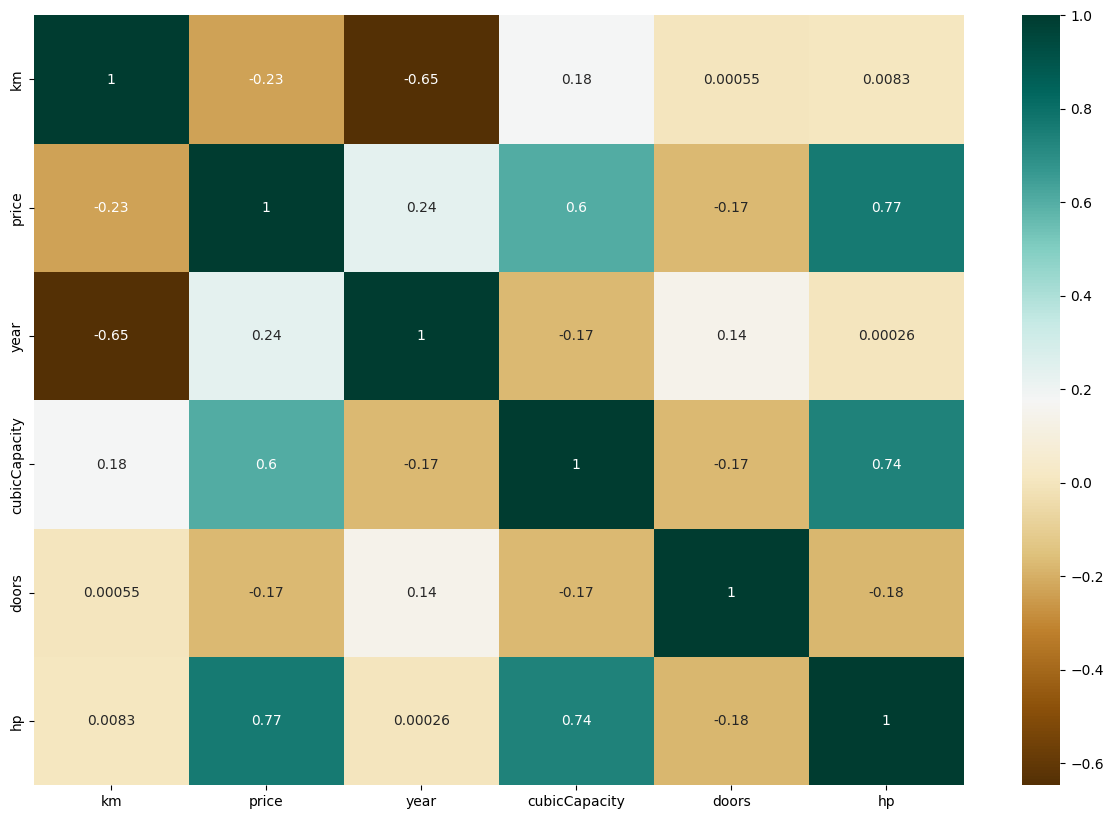

In [ ]:
plt.figure(figsize=(13,9))
sns.heatmap(dataframe.corr(), cmap='Greens', annot=True)

In [ ]:
characteristics = [ 'transmissionType', 'year', 'color', 'fuelType', 'hp', 'bodyType', 'km', 'province', 'seller_type', 'cubicCapacity', 'doors', 'make', 'model',]
result = ['price']

x_dataframe = dataframe[characteristics]

y_dataframe = dataframe[result]

x_train,x_test,y_train, y_test = train_test_split(x_dataframe, y_dataframe,random_state=1,train_size=0.80)

## 3. Arreglar los categóricos a numéricos

In [ ]:
train_dict = x_train.to_dict(orient='records')
test_dict = x_test.to_dict(orient='records')

In [ ]:
test_dict[:1]

[{'color': 'COLOR_WHITE',
  'fuelType': 'Diésel',
  'km': 93942.0,
  'make': 'VOLKSWAGEN',
  'model': 'Passat',
  'province': 'Zaragoza',
  'transmissionType': 'TRANSMISSION_MANUAL',
  'year': 2013.0,
  'seller_type': 'profesional',
  'cubicCapacity': 1968.0,
  'doors': 5.0,
  'hp': 140.0,
  'bodyType': 'BODY_TYPE_FAMILIAR'}]

In [ ]:
# transformamos las propiedas categóricas
dv = DictVectorizer(sparse = False)
dv.fit(dataframe.to_dict(orient='records'))
X_train = dv.transform(train_dict)
X_train[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.3640e+03, 5.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       9.0000e+01, 8.3538e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
X_test = dv.transform(test_dict)
X_test[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.9680e+03, 5.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.4000e+02, 9.3942e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

## 4. Hacer la red neuronal

In [ ]:
model = Sequential()
input_shape = len(X_train[0])
print('Numero de entradas:',input_shape)

model.add(Dense(X_train.shape[1], input_shape=(input_shape,), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(X_train.shape[1]*2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear', kernel_initializer='glorot_uniform'))

model.summary()

Numero de entradas: 607
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 607)               369056    
                                                                 
 dense_1 (Dense)             (None, 1214)              738112    
                                                                 
 dense_2 (Dense)             (None, 1)                 1215      
                                                                 
Total params: 1,108,383
Trainable params: 1,108,383
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilar
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))

# Learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5, min_lr=0.001, mode='min', verbose=0)

# Definir callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=0)

batch_size=int(math.sqrt(len(X_train)))
print("batch_size:",batch_size)

# Entrenamineto
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5000, batch_size=batch_size, callbacks=[early_stop,reduce_lr], use_multiprocessing=True)

batch_size: 103
Epoch 1/5000
104/104 [==============================] - 3s 23ms/step - loss: 116854672.0000 - val_loss: 93730840.0000 - lr: 0.0100
Epoch 2/5000
104/104 [==============================] - 2s 22ms/step - loss: 97661104.0000 - val_loss: 93496224.0000 - lr: 0.0100
Epoch 3/5000
104/104 [==============================] - 2s 24ms/step - loss: 92804040.0000 - val_loss: 141778416.0000 - lr: 0.0100
Epoch 4/5000
104/104 [==============================] - 3s 28ms/step - loss: 87396480.0000 - val_loss: 84326784.0000 - lr: 0.0100
Epoch 5/5000
104/104 [==============================] - 2s 21ms/step - loss: 99758624.0000 - val_loss: 83413328.0000 - lr: 0.0100
Epoch 6/5000
104/104 [==============================] - 2s 21ms/step - loss: 83649856.0000 - val_loss: 82448256.0000 - lr: 0.0100
Epoch 7/5000
104/104 [==============================] - 2s 21ms/step - loss: 82560560.0000 - val_loss: 128969832.0000 - lr: 0.0100
Epoch 8/5000
104/104 [==============================] - 2s 21ms/step - 

## 5. Evaluación del modelo

In [ ]:
# Evaluamos el modelo 
mse = model.evaluate(X_test, y_test)
print('Error cuadrático medio (MSE): %.2f' % (mse))

112/112 [==============================] - 1s 4ms/step - loss: 67598744.0000
Error cuadrático medio (MSE): 67598744.00


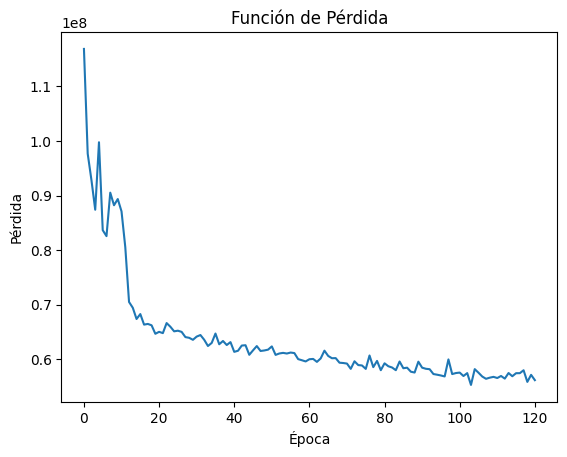

In [ ]:
# Función de perdida
plt.plot(history.history['loss'])
plt.title('Función de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

## 6. Exportamos el modelo.

In [ ]:
with open('vectorizador_coches.pck', 'wb') as f:
  pickle.dump((dv), f)
model.save('modelo_coches.hdf5')

In [ ]:
with open('vectorizador_coches.pck', 'rb') as f:
  dv_read = pickle.load(f)
model_read = tf.keras.models.load_model('modelo_coches.hdf5')

In [ ]:
files_to_compress = ['vectorizador_coches.pck','modelo_coches.hdf5']
with zipfile.ZipFile('model_with_dict_vectorizer_coches_net.zip', 'w') as zip:
  for file in files_to_compress:
    zip.write(file)

files.download('modelo_y_vectorizador.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>